In [ ]:
pip install qiskit

In [ ]:
pip install qiskit-aer

In [22]:
from qiskit import QuantumCircuit,ClassicalRegister, QuantumRegister, execute, Aer, IBMQ, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.monitor import job_monitor

In [23]:
# Create a quantum circuit with 3 qubits
qc = QuantumCircuit(3, 3)

# Prepare the initial state |0> and encode it using CNOT gates
qc.initialize([1, 0], 0)
qc.cx(0, 1)
qc.cx(0, 2)

# Include a barrier to prevent gate reordering for simulation purposes
qc.barrier()


In [24]:
print(qc)

     ┌─────────────────┐           ░ 
q_0: ┤ Initialize(1,0) ├──■────■───░─
     └─────────────────┘┌─┴─┐  │   ░ 
q_1: ───────────────────┤ X ├──┼───░─
                        └───┘┌─┴─┐ ░ 
q_2: ────────────────────────┤ X ├─░─
                             └───┘ ░ 
c: 3/════════════════════════════════
                                     


In [25]:
# Introduce a bit-flip error on the second qubit (qubit 1)
qc.x(1)

# Include another barrier
qc.barrier()


In [26]:
print(qc)

     ┌─────────────────┐           ░       ░ 
q_0: ┤ Initialize(1,0) ├──■────■───░───────░─
     └─────────────────┘┌─┴─┐  │   ░ ┌───┐ ░ 
q_1: ───────────────────┤ X ├──┼───░─┤ X ├─░─
                        └───┘┌─┴─┐ ░ └───┘ ░ 
q_2: ────────────────────────┤ X ├─░───────░─
                             └───┘ ░       ░ 
c: 3/════════════════════════════════════════
                                             


In [27]:
# Create ancilla qubits for error detection
# In practice, these would be separate qubits, but we can use the same qubits here
# and look at the output before the error correction is applied.
qc.cx(0, 1)
qc.cx(0, 2)
qc.measure([1, 2], [0, 1])  # Measure the second and third qubits into the first two classical bits

In [28]:
print(qc)

     ┌─────────────────┐           ░       ░                 
q_0: ┤ Initialize(1,0) ├──■────■───░───────░───■────■────────
     └─────────────────┘┌─┴─┐  │   ░ ┌───┐ ░ ┌─┴─┐  │  ┌─┐   
q_1: ───────────────────┤ X ├──┼───░─┤ X ├─░─┤ X ├──┼──┤M├───
                        └───┘┌─┴─┐ ░ └───┘ ░ └───┘┌─┴─┐└╥┘┌─┐
q_2: ────────────────────────┤ X ├─░───────░──────┤ X ├─╫─┤M├
                             └───┘ ░       ░      └───┘ ║ └╥┘
c: 3/═══════════════════════════════════════════════════╩══╩═
                                                        0  1 


{'001': 1024}


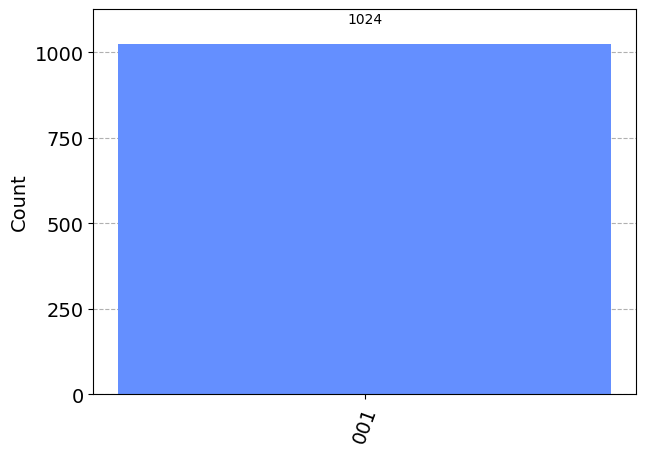

In [29]:
# Execute this on a simulator
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=1024).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)


In [30]:
# Apply correction based on the syndrome
# For simplicity, let's assume we know the second qubit had the error
# In a real scenario, we would analyze the syndrome to determine this
qc.x(1)

# Measure all qubits to check the result after error correction
qc.measure(range(3), range(3))


{'000': 1024}


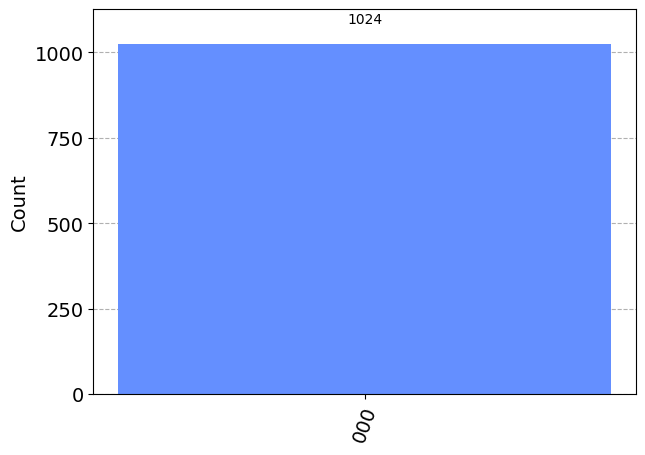

In [31]:
# Execute the circuit on the qasm simulator
result = execute(qc, backend=simulator, shots=1024).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)
